<a href="https://colab.research.google.com/github/Mezekr/Focus-level-of-students-in-online-learning/blob/main/base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive again if it is not mounted

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Building the Model from scratch (base model)

In [ ]:
# Instantiating a small convnet for emotion classification.

inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

# compilie und optimizer

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Data preprocessing
##Using image_dataset_from_directory to read images from directories

In [ ]:
# Using image_dataset_from_directory to read images from directories

train_dir = r"/content/drive/MyDrive/ProjSem_KI/emotion_dataset/train"
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size =(180, 180),
    batch_size = 8 )

val_dir = r"/content/drive/MyDrive/ProjSem_KI/emotion_dataset/validation"
validation_dataset = image_dataset_from_directory(

    val_dir,
    image_size=(180, 180),
    batch_size= 8 )

test_dir = r"/content/drive/MyDrive/ProjSem_KI/emotion_dataset/test"
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size =(180, 180),
    batch_size = 8 )

Found 270 files belonging to 3 classes.
Found 60 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


##Displaying the shapes of the data and labels yielded by the Dataset

In [ ]:
# Displaying the shapes of the data and labels yielded by the Dataset

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)


In [ ]:
# Displaying the shapes of the data and labels yielded by the Dataset

for data_batch, labels_batch in validation_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)


In [ ]:
# Displaying the shapes of the data and labels yielded by the Dataset

for data_batch, labels_batch in test_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)


#Fitting the model using a Dataset

In [ ]:
# Fitting the model using a Dataset

filepath = r"/content/drive/MyDrive/ProjSem_KI/Models/base_model.keras"

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath,
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
34/34 [==============================] - 2s 52ms/step - loss: 0.9465 - accuracy: 0.5370 - val_loss: 1.0977 - val_accuracy: 0.3667
Epoch 2/30
34/34 [==============================] - 2s 43ms/step - loss: 0.9192 - accuracy: 0.5259 - val_loss: 1.1424 - val_accuracy: 0.4000
Epoch 3/30
34/34 [==============================] - 2s 41ms/step - loss: 0.8832 - accuracy: 0.5852 - val_loss: 1.1571 - val_accuracy: 0.4000
Epoch 4/30
34/34 [==============================] - 2s 42ms/step - loss: 0.8690 - accuracy: 0.6111 - val_loss: 1.1092 - val_accuracy: 0.3500
Epoch 5/30
34/34 [==============================] - 2s 43ms/step - loss: 0.8686 - accuracy: 0.6148 - val_loss: 1.1308 - val_accuracy: 0.4000
Epoch 6/30
34/34 [==============================] - 2s 42ms/step - loss: 0.7898 - accuracy: 0.6444 - val_loss: 1.3232 - val_accuracy: 0.3167
Epoch 7/30
34/34 [==============================] - 2s 43ms/step - loss: 0.7895 - accuracy: 0.6556 - val_loss: 1.2337 - val_accuracy: 0.3500
Epoch 8/30
34

# Displaying curves of loss and accuracy during training

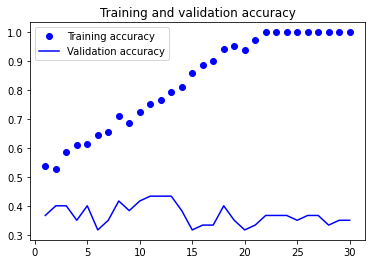

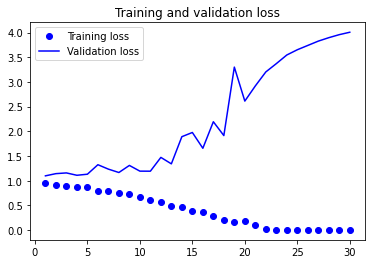

In [ ]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Evaluating the model on the test set

In [ ]:
# Evaluating the model on the test set

saved_model = r"/content/drive/MyDrive/ProjSem_KI/Models/base_model.keras"

test_model = keras.models.load_model(saved_model)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


8/8 [==============================] - 0s 14ms/step - loss: 0.9884 - accuracy: 0.5000
Test accuracy: 0.500
